In [ ]:
! pip install -q einops torchvision "transformers==4.45.1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 113.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 77.3 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModelForCausalLM, AutoProcessor, GenerationConfig
from PIL import Image
import requests

Molmo 7B-D is a **text-image-to-text** model based on Qwen2-7B and uses OpenAI CLIP as vision backbone

In [ ]:
processor = AutoProcessor.from_pretrained(
    'allenai/Molmo-7B-D-0924',
    trust_remote_code=True,
    torch_dtype='auto',
    device_map='auto'
)

# load the model
model = AutoModelForCausalLM.from_pretrained(
    'allenai/Molmo-7B-D-0924',
    trust_remote_code=True,
    torch_dtype='auto',
    device_map='auto'
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


processor_config.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

preprocessing_molmo.py:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

image_preprocessing_molmo.py:   0%|          | 0.00/22.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/allenai/Molmo-7B-D-0924:
- image_preprocessing_molmo.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/allenai/Molmo-7B-D-0924:
- preprocessing_molmo.py
- image_preprocessing_molmo.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


preprocessor_config.json:   0%|          | 0.00/634 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/92.2k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.11M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/14.3k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/12.0k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config_molmo.py:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/allenai/Molmo-7B-D-0924:
- config_molmo.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_molmo.py:   0%|          | 0.00/95.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/allenai/Molmo-7B-D-0924:
- modeling_molmo.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/62.6k [00:00<?, ?B/s]

model-00001-of-00007.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00007.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00007.safetensors:   0%|          | 0.00/4.73G [00:00<?, ?B/s]

model-00004-of-00007.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00005-of-00007.safetensors:   0%|          | 0.00/4.66G [00:00<?, ?B/s]

model-00006-of-00007.safetensors:   0%|          | 0.00/4.27G [00:00<?, ?B/s]

model-00007-of-00007.safetensors:   0%|          | 0.00/3.80G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/69.0 [00:00<?, ?B/s]

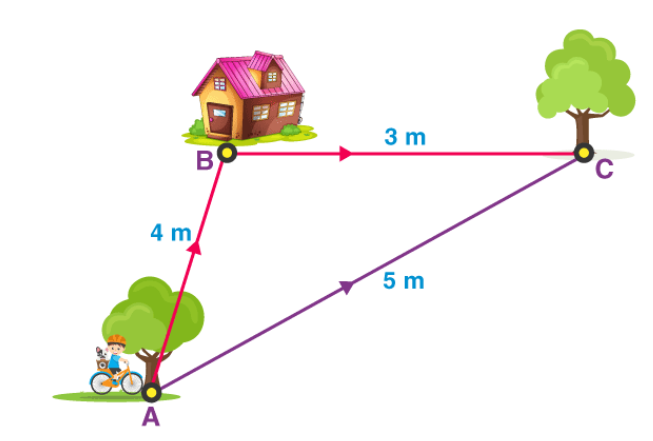

In [ ]:
image = Image.open("/content/14.png").convert("RGB")
image

In [ ]:
inputs = processor.process(
    images=[image],
    text="Describe this image."
)

In [ ]:
# move inputs to the correct device and make a batch of size 1
inputs = {k: v.to(model.device).unsqueeze(0) for k, v in inputs.items()}

# generate output
output = model.generate_from_batch(
    inputs,
    GenerationConfig(max_new_tokens=200, stop_strings="<|endoftext|>"),
    tokenizer=processor.tokenizer
)

In [ ]:
# only get generated tokens; decode them to text
generated_tokens = output[0,inputs['input_ids'].size(1):]
generated_text = processor.tokenizer.decode(generated_tokens, skip_special_tokens=True)
generated_text

' The image is a detailed diagram illustrating the shortest route between three points: a house, a tree, and a cyclist. The house, labeled "B," is depicted with a brown exterior and a pink roof, situated on a patch of green grass. The tree, labeled "C," is a green tree with a brown trunk, also on green grass. The cyclist, labeled "A," is a boy wearing an orange helmet, riding a bicycle with a basket on the front, positioned near the tree. \n\nThree arrows form a triangle connecting these points, each labeled with the distance between them. The arrow from "B" to "C" is red and indicates a distance of 3 meters. The arrow from "C" to "A" is purple and shows a distance of 5 meters. The arrow from "A" to "B" is also red but longer, indicating a distance of 4 meters. This diagram effectively demonstrates the shortest path from the house to the tree, which'

In [ ]:
inputs = processor.process(
    images=[image],
    text="What is the displacement (shortest distance) between A to C"
)

In [ ]:
inputs = {k: v.to(model.device).unsqueeze(0) for k, v in inputs.items()}

output = model.generate_from_batch(
    inputs,
    GenerationConfig(max_new_tokens=200, stop_strings="<|endoftext|>"),
    tokenizer=processor.tokenizer
)

generated_tokens = output[0,inputs['input_ids'].size(1):]
generated_text = processor.tokenizer.decode(generated_tokens, skip_special_tokens=True)
generated_text

' The displacement (shortest distance) between points A and C is 5 meters. This can be determined by looking at the purple line connecting points A and C, which is labeled with a "5 m" measurement.'

In [ ]:
inputs = processor.process(
    images=[image],
    text="What is the distance between A to C using A to B and B to C path"
)

In [ ]:
inputs = {k: v.to(model.device).unsqueeze(0) for k, v in inputs.items()}

output = model.generate_from_batch(
    inputs,
    GenerationConfig(max_new_tokens=200, stop_strings="<|endoftext|>"),
    tokenizer=processor.tokenizer
)

generated_tokens = output[0,inputs['input_ids'].size(1):]
generated_text = processor.tokenizer.decode(generated_tokens, skip_special_tokens=True)
generated_text

' To calculate the distance from A to C using the A to B and B to C paths, we need to add the distances of these two segments together.\n\nThe distance from A to B is 4 meters.\nThe distance from B to C is 3 meters.\n\nAdding these two distances:\n4 meters + 3 meters = 7 meters\n\nTherefore, the total distance from A to C using the A to B and B to C path is 7 meters.'